# Network Characterization

In [182]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Connectivity

In [183]:
get_degree_list = lambda G: np.array(list(dict(G.degree()).values()))

### Compute degree moments

In [184]:
get_moment = lambda G, m: np.mean([G.degree(i)**m for i in G.nodes])

### Computing Degree Distribution

In [185]:
def get_degree_distribution(degree_list):
    hist, bins = np.histogram(
        degree_list, 
        bins=max(degree_list) - 1,
        density=True
    )
    return dict(zip(bins[:-1], hist))

Text(0, 0.5, 'P(k)')

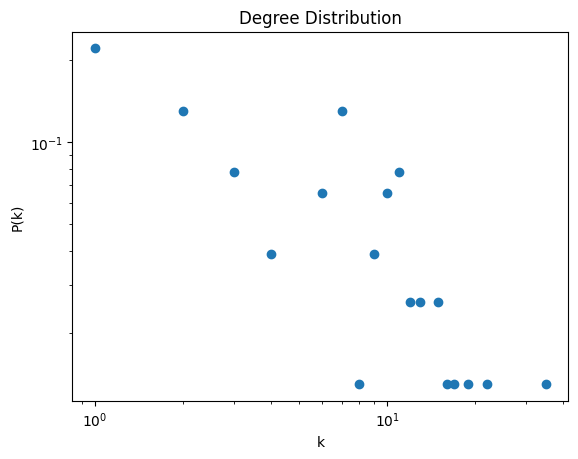

In [186]:
degree_distribution = get_degree_distribution(degree_list)

plt.scatter(
    degree_distribution.keys(), 
    degree_distribution.values()
)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution')
plt.xlabel('k')
plt.ylabel('P(k)')

### Shannon Entropy

In [194]:
get_shannon_entropy = lambda x: np.sum([-x[k]*math.log(x[k], 2) if x[k] > 0 else 0 for k in x])

### Complexity 

In [188]:
get_complexity = lambda G: get_moment(G, 2) / get_moment(G, 1)

## Questions

**Question 1**: Moments 3 and 4 for Les Miserables graph

In [189]:
lesmis = nx.read_gml("data/lesmis.gml")
print(f"E[degree^3] = {get_moment(lesmis, 3)}")
print(f"E[degree^4] = {get_moment(lesmis, 4)}")

E[degree^3] = 1408.025974025974
E[degree^4] = 33592.72727272727


**Question 2:** Complexity for Powergrid graph

In [190]:
powergrid = nx.read_edgelist("data/powergrid.txt")
print(f"Complexity = {get_complexity(powergrid)}")

Complexity = 3.8712465878070974


**Question 3:** Shannon Entropy for Euroroad graph

In [196]:
euroroad = nx.read_edgelist("data/euroroad.txt")
euroroad_degree_list = get_degree_list(euroroad)
euroroad_degree_distribution = get_degree_distribution(euroroad_degree_list)
print(f"Shannon Entropy = {get_shannon_entropy(euroroad_degree_distribution)}")

Shannon Entropy = 2.003310387452775


**Question 4**: Transitivity and Clustering for USAirport graph

In [192]:
usairport = nx.read_weighted_edgelist("data/usairport.txt")
transitivity = nx.transitivity(usairport)
print(f"Transitivity = {transitivity}")
average_clustering = nx.average_clustering(usairport)
print(f"Average Clustering = {average_clustering}")

Transitivity = 0.38414344664491556
Average Clustering = 0.504152539209577


**Question 5:** Complexity and Shannon Entropy for USAirport graph

In [193]:
usairport_degree_list = get_degree_list(usairport)
usairport_degree_distribution = get_degree_distribution(usairport_degree_list)
print(f"Shannon Entropy = {get_shannon_entropy(usairport_degree_distribution)}")
print(f"Complexity = {get_complexity(usairport)}")

Shannon Entropy = 4.9859776465392365
Complexity = 112.22224803950043
